<a href="https://colab.research.google.com/github/omonimus1/plant_classification/blob/development/flower-classifier-notebooks/Transfer_Learning_DenseNet201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#changing the working directory and entering to dataset directory for my google drive
# %cd /content/gdrive/Othercomputers/DavideLaptop/Desktop/flower_splitted/flowers_
from google.colab import drive
import os
from os.path import isfile, join, abspath, exists, isdir, expanduser
from os import listdir, makedirs, getcwd, remove
from pathlib import Path
from keras.layers import  Flatten, Input, Dense, Lambda,
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input, DenseNet201
import numpy as np
from glob import glob
import matplotlib.pyplot as plotter

mount_drive_location= '/content/gdrive/'
drive.mount(mount_drive_location, force_remount=True)
print(os.listdir(mount_drive_location + 'Othercomputers/DavideLaptop/Desktop/flowers_splitted/flowers'))
flowersPath = Path( mount_drive_location+'Othercomputers/DavideLaptop/Desktop/flowers_splitted/flowers')

# Each species of flower is contained in a separate folder, & this is to get all the
# sub-directories
flowers = os.listdir(flowersPath)  

Mounted at /content/gdrive/
['test', 'train']


In [ ]:
%cd flower_classification/

/content/drive/MyDrive/kaggle/image_classification/flower_classification


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = '/content/gdrive/Othercomputers/DavideLaptop/Desktop/flowers_splitted/flowers/train'
valid_path = '/content/gdrive/Othercomputers/DavideLaptop/Desktop/flowers_splitted/flowers/test'
# add preprocessing layer to the front of DenseNet201
densenet = DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# don't train existing weights
for layer in densenet.layers:
  layer.trainable = False

# useful for getting number of classes
folders = glob('/content/gdrive/Othercomputers/DavideLaptop/Desktop/flowers_splitted/flowers/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(densenet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=densenet.input, outputs=prediction)
# view the structure of the model
model.summary()

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/gdrive/Othercomputers/DavideLaptop/Desktop/flowers_splitted/flowers/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 3027 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/gdrive/Othercomputers/DavideLaptop/Desktop/flowers_splitted/flowers/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical'
                                            )

Found 1296 images belonging to 5 classes.


In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/4
48/48 [==============================] - 754s 16s/step - loss: 2.7788 - accuracy: 0.7506 - val_loss: 1.2157 - val_accuracy: 0.8264
Epoch 2/4
48/48 [==============================] - 72s 1s/step - loss: 0.4437 - accuracy: 0.9174 - val_loss: 1.5606 - val_accuracy: 0.8048
Epoch 3/4
48/48 [==============================] - 72s 1s/step - loss: 0.2927 - accuracy: 0.9313 - val_loss: 1.1524 - val_accuracy: 0.8341
Epoch 4/4
48/48 [==============================] - 72s 1s/step - loss: 0.1886 - accuracy: 0.9528 - val_loss: 1.2894 - val_accuracy: 0.8233


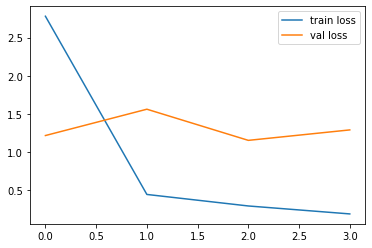

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plotter.plot(r.history['loss'], label='train loss')
plotter.plot(r.history['val_loss'], label='val loss')
plotter.legend()
plotter.show()
plotter.savefig('LossVal_loss')

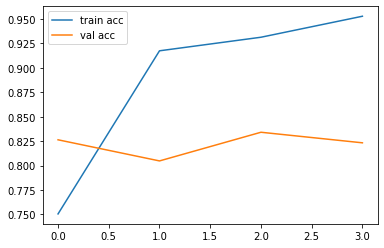

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plotter.plot(r.history['accuracy'], label='train acc')
plotter.plot(r.history['val_accuracy'], label='val acc')
plotter.legend()
plotter.show()
plotter.savefig('AccVal_acc')